## Czyszczenie danych

#### Interesują nas tylko wyścigi od 1991 do 2022 roku (ze względu na zaszumienia np. wyścigi powyżej 200 okrążeń, sezon 2023 nie został w całości uwzględniony w tabeli results i by uwzględnić całą karierę Michaela Schumachera)

![query1](query1.png)

![query2](query2.png)

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

db_name = 'f1.db'
connection = sqlite3.connect(db_name)

query = "SELECT ra.name, ra.year, d.forename || ' ' || d.surname AS driver_name, c.name, re.positionOrder, re.laps, s.status FROM results re INNER JOIN races ra ON ra.raceId = re.raceId INNER JOIN drivers d ON d.driverId = re.driverId INNER JOIN constructors c ON c.constructorId = re.constructorId INNER JOIN status s ON s.statusId = re.statusId"
result = connection.execute(query).fetchall()

columns = ["race_name", "race_year", "driver_name", "constructor_name", "driver_final_position", "laps_driven", "ending"]

df = pd.DataFrame(result, columns=columns)

connection.close()

print(df)

                   race_name  race_year        driver_name constructor_name  \
0      Australian Grand Prix       2008     Lewis Hamilton          McLaren   
1      Australian Grand Prix       2008      Nick Heidfeld       BMW Sauber   
2      Australian Grand Prix       2008       Nico Rosberg         Williams   
3      Australian Grand Prix       2008    Fernando Alonso          Renault   
4      Australian Grand Prix       2008  Heikki Kovalainen          McLaren   
...                      ...        ...                ...              ...   
11434   Abu Dhabi Grand Prix       2022    Mick Schumacher     Haas F1 Team   
11435   Abu Dhabi Grand Prix       2022    Kevin Magnussen     Haas F1 Team   
11436   Abu Dhabi Grand Prix       2022     Lewis Hamilton         Mercedes   
11437   Abu Dhabi Grand Prix       2022    Nicholas Latifi         Williams   
11438   Abu Dhabi Grand Prix       2022    Fernando Alonso   Alpine F1 Team   

       driver_final_position  laps_driven          

## Średnia

In [2]:
def mean(values):
    mean = 0
    for value in values:
        mean += value
    mean /= len(values)
    return mean

## Mediana

In [3]:
def median(values):
    n = len(values)
    if n % 2 == 1:
        return values[n // 2 + 1]
    else:
        return (values[n // 2] + values[n // 2 + 1]) / 2

## Rozstęp

In [4]:
def sample_range(values):
    n = len(values)
    return values.iloc[n-1] - values.iloc[0]

## Wariancja

In [5]:
def variance(values):
    n = len(values)
    m = mean(values)
    variance = 0
    for value in values:
        variance += (value - m) ** 2
    variance /= (n - 1)
    return variance

## Średnie odchylenie

In [6]:
def average_deviation(values):
    n = len(values)
    deviation = 0
    m = mean(values)
    for value in values:
        deviation += abs(value - m)
    return deviation / n

## Dolny kwartyl

In [7]:
def left_hinge(values):
    med = median(values)
    lower_values = []
    for value in values:
        if value <= med:
            lower_values.append(value)
    return median(lower_values)

## Górny kwartyl

In [8]:
def right_hinge(values):
    med = median(values)
    upper_values = []
    for value in values:
        if value > med:
            upper_values.append(value)
    return median(upper_values)

In [12]:
def print_info(values):
    print("Mean:\n", round(mean(values), 2))

    print("Median:\n", round(median(values.tolist()), 2))

    print("Sample range:\n", round(sample_range(values), 2))

    print("Variance:\n", round(variance(values), 2))

    print("Standard deviation:\n", round(variance(values) ** (1 / 2), 2))

    print("Average deviation:\n", round(average_deviation(values), 2))

    print("Right hinge:\n", round(right_hinge(values.tolist()),2))

    print("Left hinge:\n", round(left_hinge(values.tolist()),2))

In [10]:
laps = df["laps_driven"].astype(int)
laps.sort_values(ascending=True, inplace=True)
print(laps)

916       0
1308      0
1307      0
5113      0
5112      0
         ..
10527    87
10529    87
10530    87
10523    87
10526    87
Name: laps_driven, Length: 11439, dtype: int32


In [13]:
print_info(laps)

Mean:
 50.32
Median:
 56
Sample range:
 87
Variance:
 434.14
Standard deviation:
 20.84
Average deviation:
 15.92
Right hinge:
 67
Left hinge:
 45.0


## Histogram

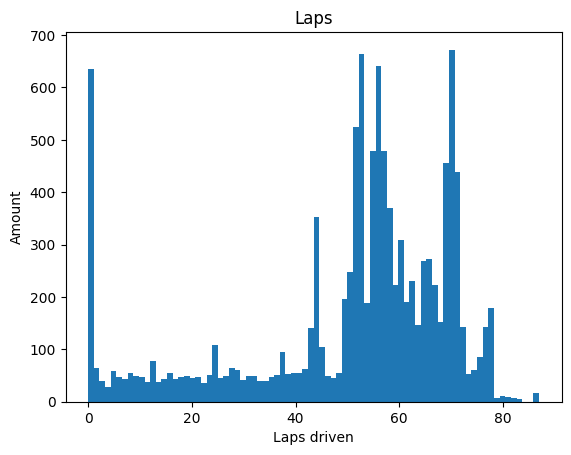

In [12]:
plt.hist(laps, bins=80)
plt.title("Laps")
plt.xlabel("Laps driven")
plt.ylabel("Amount")
plt.show()

## Boxplot

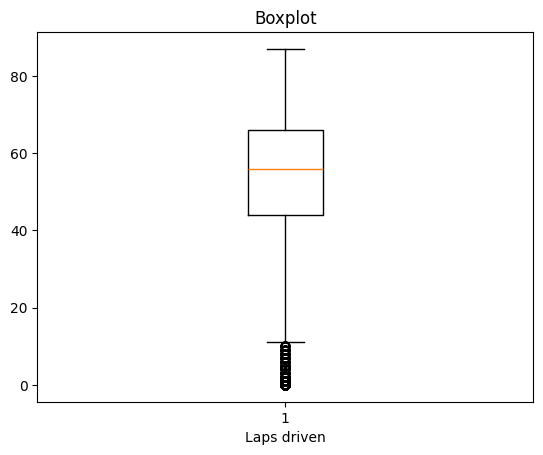

In [13]:
plt.boxplot(laps)
plt.title("Boxplot")
plt.xlabel("Laps driven")
plt.show()

## Violinplot

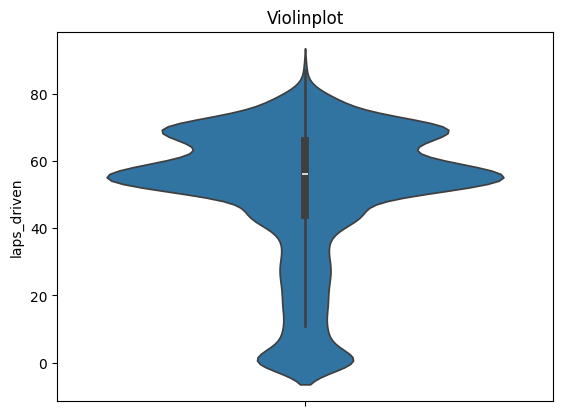

In [14]:
sns.violinplot(laps)
plt.title("Violinplot")
plt.show()

In [15]:
drivers = df["driver_name"]
print(drivers)

0           Lewis Hamilton
1            Nick Heidfeld
2             Nico Rosberg
3          Fernando Alonso
4        Heikki Kovalainen
               ...        
11434      Mick Schumacher
11435      Kevin Magnussen
11436       Lewis Hamilton
11437      Nicholas Latifi
11438      Fernando Alonso
Name: driver_name, Length: 11439, dtype: object


## Kierowcy z największa ilością wyścigów

driver_name
Fernando Alonso         358
Kimi RĂ¤ikkĂ¶nen        352
Lewis Hamilton          310
Rubens Barrichello      310
Jenson Button           309
Sebastian Vettel        300
Felipe Massa            271
Michael Schumacher      270
Jarno Trulli            256
David Coulthard         247
Sergio PĂ©rez           237
Daniel Ricciardo        232
Giancarlo Fisichella    231
Mark Webber             217
Nico Rosberg            206
Name: count, dtype: int64


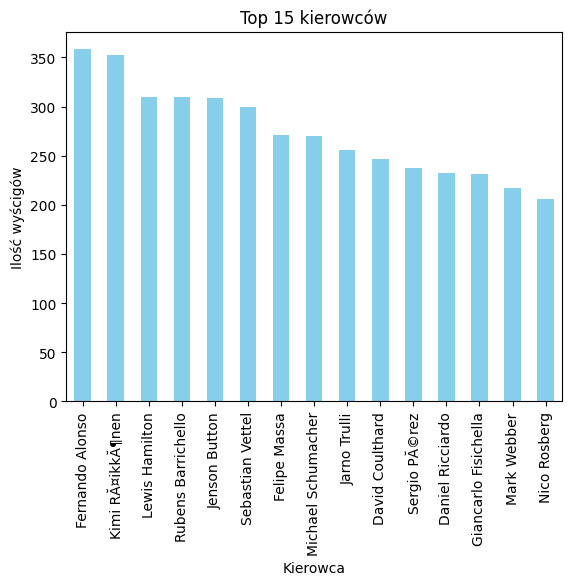

In [16]:
top_drivers = drivers.value_counts()[:15]
print(top_drivers)
top_drivers.plot(kind='bar', color='skyblue')
plt.title('Top 15 kierowców')
plt.xlabel('Kierowca')
plt.ylabel('Ilość wyścigów')
plt.show()

## Najpopularniejsze przyczyny nieukończenia wyścigu (DNF)

Collision        552
Engine           504
Spun off         358
Gearbox          291
Accident         264
                ... 
Tyre puncture      1
Engine fire        1
Oil line           1
Seat               1
Driver Seat        1
Name: ending, Length: 91, dtype: int64


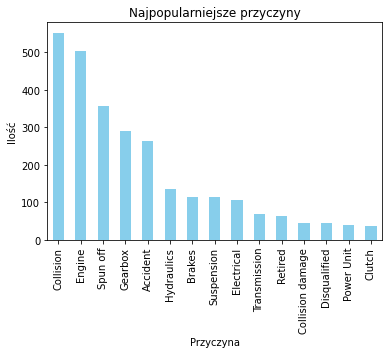

In [20]:
dnfs = df[~df["ending"].str.contains(r'\b(?:Lap|Laps|Finished|Did not qualify)\b', case=False, regex=True)]["ending"].value_counts()
print(dnfs)
dnfs[:15].plot(kind='bar', color='skyblue')
plt.title("Najpopularniejsze przyczyny")
plt.xlabel("Przyczyna")
plt.ylabel("Ilość")
plt.show()

# Analiza przyczyn nieukończenia wyścigu

    index  count
0    1994    249
1    1995    211
2    1996    178
3    1999    172
4    1997    170
5    2002    161
6    2001    157
7    2000    154
8    1998    153
9    2006    128
10   2010    118
11   2003    111
12   2007    103
13   2004    102
14   2005    100
15   2017     95
16   2012     91
17   2008     87
18   2014     86
19   2018     85
20   2016     84
21   2011     82
22   2015     81
23   2022     74
24   2009     70
25   2013     64
26   2019     60
27   2021     59
28   2020     57


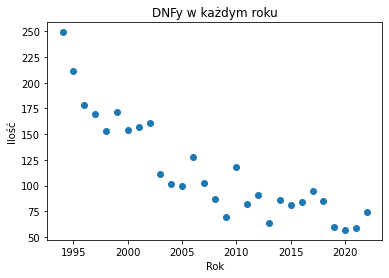

In [22]:
dnfs2 = df[~df["ending"].str.contains(r'\b(?:Lap|Laps|Finished)\b', case=False, regex=True)]['race_year']
grouped_dnfs = dnfs2.value_counts().reset_index(name='count')
print(grouped_dnfs)

plt.scatter(grouped_dnfs['index'], grouped_dnfs['count'])
plt.xlabel('Rok')
plt.ylabel('Ilość')
plt.title('DNFy w każdym roku')
plt.show()

### Regresja liniowa

In [23]:
def linear_regression(x_values, y_values):
    B = [x for x in range(5000, 15000, 600)]
    best_model_b = B[0]
    best_model_a = 0
    best_error = float("inf")
    learning_rate = 1e-7
    epochs = 100

    n = x_values.size
    for b in B:
        a = best_model_a
        for _ in range(epochs):
            dl_da = 0
            dl_db = 0
            for i in range(n):
                dl_da += (a * x_values[i] + b - y_values[i]) * x_values[i]
                dl_db += (a * x_values[i] + b - y_values[i])
            # gradient descent
            a -= 2/n * dl_da * learning_rate
            b -= 2/n * dl_db * learning_rate

        error = 0
        for i in range(x_values.size):
            error += (a * x_values[i] + b - y_values[i]) ** 2
        if error < best_error:
            best_error = error
            best_model_b = b
            best_model_a = a
    print(best_model_a, best_model_b, best_error)

    plt.scatter(x_values, y_values)
    plt.plot(list(range(1993, 2022)), [best_model_a * x + best_model_b for x in range(1993, 2022)], color="red")
    plt.show()

-5.121891597085801 10399.999851195094 14361.207011753331


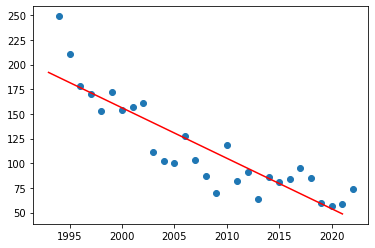

In [24]:
linear_regression(grouped_dnfs['index'], grouped_dnfs['count'])

   constructor_name  num of dnfs
0           McLaren          278
1          Williams          277
2            Sauber          251
3           Minardi          198
4           Ferrari          192
5            Jordan          182
6        Toro Rosso          147
7           Renault          137
8          Red Bull          132
9            Arrows          117
10              BAR          102
11          Tyrrell           93
12         Benetton           92
13      Force India           88
14            Prost           81
15           Toyota           81
16           Jaguar           78
17     Haas F1 Team           64
18          Stewart           63
19         Footwork           61
20          Pacific           60
21         Mercedes           51
22         Lotus F1           42
23            Forti           39
24           Ligier           38
25              HRT           36
26      Super Aguri           32
27            Lotus           26
28         Caterham           25
29        

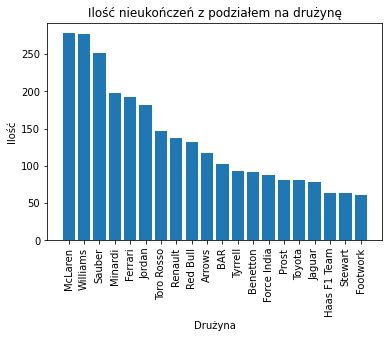

In [60]:
dnfs3 = df[~df["ending"].str.contains(r'\b(?:Lap|Laps|Finished)\b', case=False, regex=True)]['constructor_name']
dnfs3 = dnfs3.value_counts()
dnfs3 = pd.DataFrame({'constructor_name': dnfs3.index, 'num of dnfs': dnfs3.values})
print(dnfs3)
plt.bar(dnfs3['constructor_name'][:20], dnfs3['num of dnfs'][:20])
plt.title("Ilość nieukończeń z podziałem na drużynę")
plt.xlabel("Drużyna")
plt.xticks(rotation=90)
plt.ylabel("Ilość")
plt.show()

## Czy jest to dobra reprezentacja danych?

   constructor_name  num of dnfs  number of races
0           McLaren          278             1062
1          Williams          277             1061
2            Sauber          251              757
3           Minardi          198              402
4           Ferrari          192             1062
5            Jordan          182              404
6        Toro Rosso          147              536
7           Renault          137              556
8          Red Bull          132              696
9            Arrows          117              190
10              BAR          102              236
11          Tyrrell           93              161
12         Benetton           92              264
13      Force India           88              424
14            Prost           81              165
15           Toyota           81              280
16           Jaguar           78              170
17     Haas F1 Team           64              288
18          Stewart           63               98


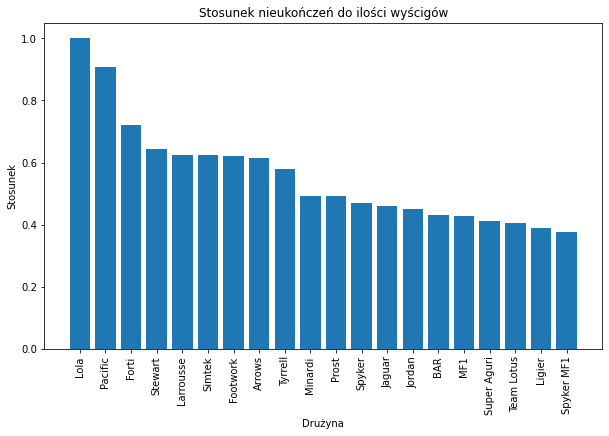

In [71]:
constructors_num = df['constructor_name'].value_counts()
constructors = pd.DataFrame({'constructor_name': constructors_num.index, 'number of races': constructors_num.values})
constructors_merged = pd.merge(dnfs3, constructors, on='constructor_name')
print(constructors_merged)
final_data = pd.DataFrame({'constructor_name': constructors_merged['constructor_name'], 'ratio': constructors_merged['num of dnfs'] / constructors_merged['number of races']})
final_data = final_data.sort_values(by='ratio', ascending=False)
plt.bar(final_data['constructor_name'][:20], final_data['ratio'][:20])
plt.xticks(rotation=90)
plt.title("Stosunek nieukończeń do ilości wyścigów")
plt.xlabel("Drużyna")
plt.ylabel("Stosunek")
plt.show()